In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carregar o arquivo para o dataframe
df_exames = pd.read_csv('./dataset/exame_diabetes.csv')

In [5]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [6]:
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [7]:
# Remover a coluna id_paciente
df_exames.drop(columns=['id_paciente'] , axis=1 , inplace=True)

In [8]:
# Converter uma variável categórica (gênero) em numérica , usando One-Hot Encoding
df_exames = pd.get_dummies(df_exames , columns=['genero'] , dtype='int64')

In [9]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
5,64,93,190,117,0,1
6,21,70,182,90,1,0
7,60,101,179,84,1,0
8,63,83,189,92,1,0
9,65,78,175,121,1,0


<Axes: >

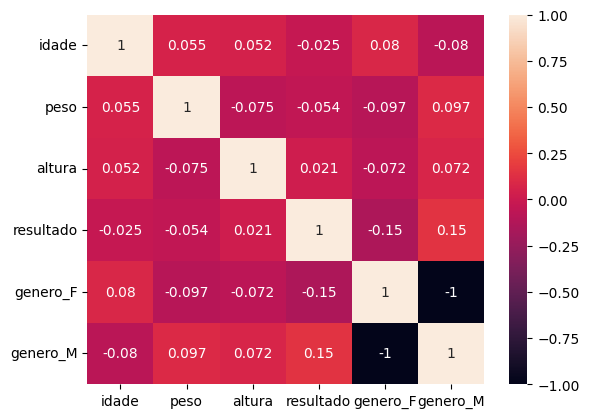

In [10]:
sns.heatmap(df_exames.corr() , vmin=-1 , vmax=1 ,  annot=True)

<Axes: >

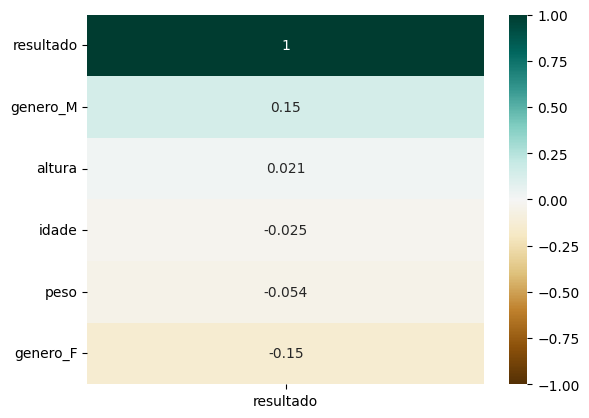

In [11]:
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado' , ascending=False) , vmin=-1 , vmax=1 , annot=True , cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


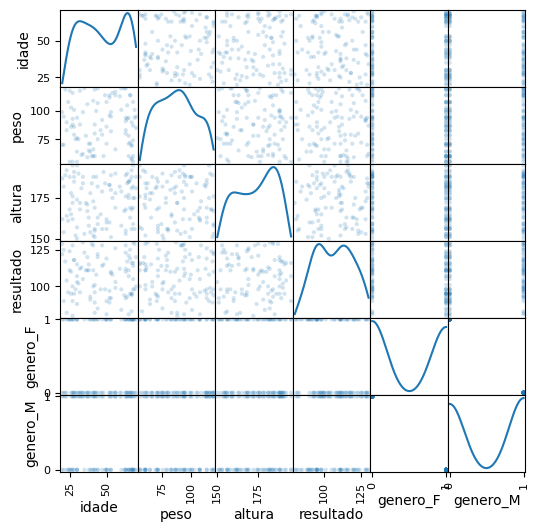

In [12]:
pd.plotting.scatter_matrix(df_exames , alpha=0.2 , figsize=(6,6) , diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>, <Axes: >, <Axes: >]],
      dtype=object)

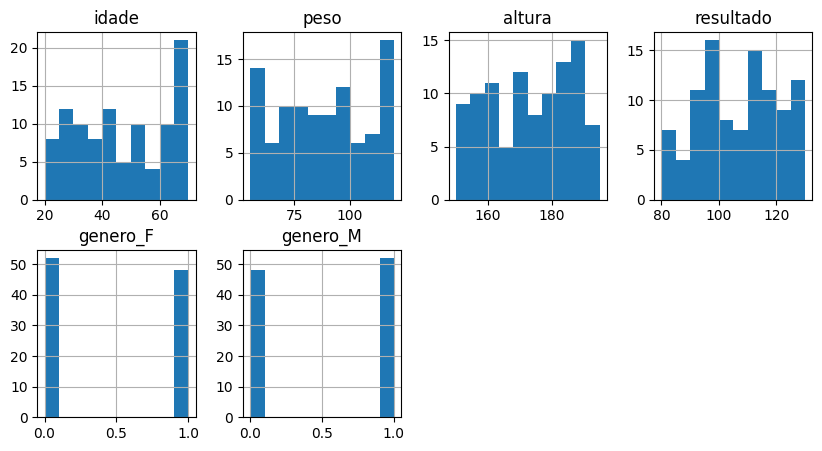

In [13]:
df_exames.hist(layout=(2,4) , figsize=(10,5))

In [14]:
# Criar uma nova feature
# IMC (Índice de Massa Corporal)
# IMC = peso / altura^2
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100)**2) )  

In [15]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [16]:
dict_regressao = {'tempo_casa': [1 , 3 , 6 , 9 , 10 , 14 , 28] , 'salario': [1500 , 3000 , 4500 , 6000 , 7000 , 8500 , 10000]}

In [17]:
df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

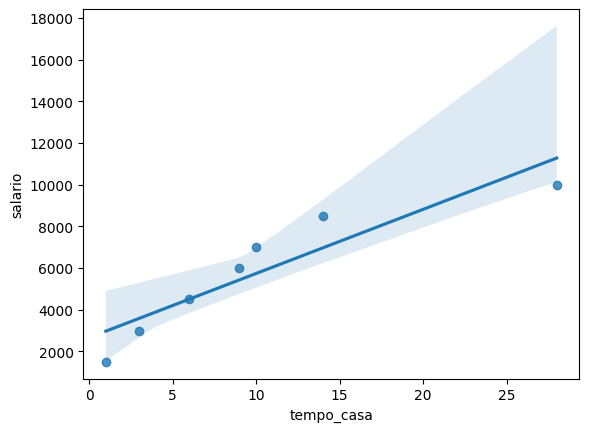

In [18]:
sns.regplot(data=df_regressao_simples , x='tempo_casa' , y='salario')

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score

In [20]:
# Modelo 1 - sem IMC 
X = df_exames.drop(columns=['imc' , 'resultado'])
y = df_exames['resultado']

In [21]:
# Dividir conjunto entre treino e teste
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=0.7 , random_state=51)

In [22]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(70, 30, 70, 30)

In [23]:
# Treinar o algoritmo de Regressão Linear 
model_1 = LinearRegression().fit(X_train , y_train)

In [24]:
# Geral predições do conjunto testes com base no Modelo 1
y_pred = model_1.predict(X_test)

In [25]:
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [26]:
# Equação da reta - Regressão Linear
# y = ax + b
# Mostra o a
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [27]:
# Mostra o b
model_1.intercept_

np.float64(94.21133142019875)

In [28]:
# R2 Score - Conjunto de treinamento
model_1.score(X_train , y_train)

0.06218388634297267

In [29]:
# R2 Score - Conjunto de teste
model_1.score(X_test , y_test)  

-0.1364090447910642

In [30]:
# R2 Score - Teste
r2_score(y_test , y_pred)

-0.1364090447910642

In [31]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test , y_pred)

12.695569181179541

In [32]:
# Segundo modelo - apenas IMC
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [33]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=0.7 , random_state=51)

In [34]:
# Treinar o alritmo de Regressão Linear
model_2 = LinearRegression().fit(X_train , y_train)

In [35]:
# Gerar predição com base no modelo para o conjunto de testes
y_pred = model_2.predict(X_test)

In [36]:
model_2.coef_

array([-0.21677589])

In [37]:
model_2.intercept_

np.float64(112.15019229088837)

In [38]:
# R2 Score no conjunto de treinamento
model_2.score(X_train , y_train)

0.015285962664806862

In [39]:
# R2 Score no conjunto de teste
model_2.score(X_test , y_test)

-0.08898328562401758

In [40]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test , y_pred)

12.5056514070601

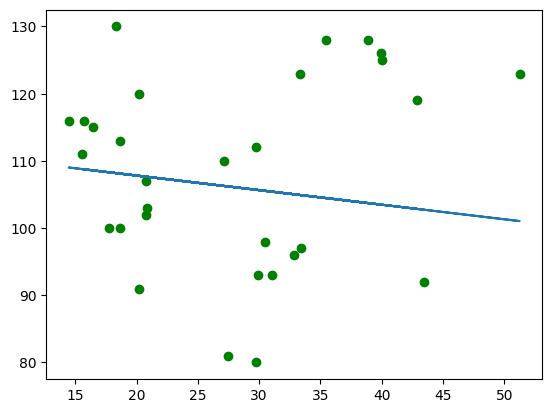

In [41]:
# Mostrar como a reta foi calculada 
plt.scatter(X_test , y_test , color='g')
plt.plot(X_test , y_pred)